In [1]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Thu Aug  6 09:36:19 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline
#Use to import the file into google Colab drive
from google.colab import files 
#Use to import io, which opens the file from the Colab drive
import io

In [5]:
#Reading the file which has email interactions
du = files.upload()

Saving interactions.xlsx to interactions.xlsx


In [6]:
i=pd.read_excel(du["interactions.xlsx"])

In [7]:
i['InteractionDate']=pd.to_datetime(i['InteractionDate'])
i['Extracted Interaction Text']=i['Extracted Interaction Text'].astype(str)
i.head()

,interactionID,fromEmailId,toEmailId,InteractionDate,InteractionType(Call/Email/SMS),Extracted Interaction Text
0,8842411,gladys@piedpiper.com,kristle@dontechi.com,2016-01-04,Call,I thoroughly enjoyed your presentation yesterd...
1,8015509,donn@piedpiper.com,orpha@umbrellacorporation.com,2016-01-04,Call,speaking with you and your staff will be a tre...
2,5976842,kary@piedpiper.com,claribel@goodsilron.com,2016-01-04,Email,"However, I am unable to join because of my fam..."
3,1471794,boris@piedpiper.com,gordon@scotfind.com,2016-01-04,Call,We are extremely sorry to inform you that we h...
4,4330320,darcel@piedpiper.com,benny@treequote.com,2016-01-04,Call,I don't think it's possible for me to meet you


In [8]:
i.shape

(316776, 6)

In [9]:
i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316776 entries, 0 to 316775
Data columns (total 6 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   interactionID                    316776 non-null  int64         
 1   fromEmailId                      316776 non-null  object        
 2   toEmailId                        316776 non-null  object        
 3   InteractionDate                  316776 non-null  datetime64[ns]
 4   InteractionType(Call/Email/SMS)  316776 non-null  object        
 5   Extracted Interaction Text       316776 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 14.5+ MB


In [10]:
#Reading the file which has deal stage(won,lost)

iu = files.upload()

Saving sales.xlsx to sales.xlsx


In [11]:
j=pd.read_excel(iu["sales.xlsx"])

In [12]:
j['Created Date']=pd.to_datetime(j['Created Date'])
j['Close Date']=pd.to_datetime(j['Close Date'])
j.head()

,Account,Opportunity_ID,Sales_Agent,SalesAgentEmailID,ContactEmailID,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff
0,Konex,3KR50X38,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255,2016-01-04,2016-05-24,141
1,Finjob,YFS5KLJJ,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,45,2016-01-04,2016-11-02,303
2,Kinnamplus,N0ONCYVZ,Donn Cantrell,donn@piedpiper.com,monte@kinnamplus.com,Lost,MG Special,1054,2016-01-06,2016-12-07,336
3,Genco Pura Olive Oil Company,IBEUTCSW,James Ascencio,james@piedpiper.com,karole@gencopuraoliveoilcompany.com,In Progress,MG Advanced,1054,2016-01-06,2016-09-11,249
4,Initech,G8AO5FA2,Wilburn Farren,wilburn@piedpiper.com,alejandro@initech.com,Lost,MG Advanced,517,2016-01-06,2016-09-18,256


In [13]:
#Renaming some columns in the deal stage file

j=j.rename(columns={"SalesAgentEmailID":"fromEmailId","ContactEmailID":"toEmailId"})
j.head()

,Account,Opportunity_ID,Sales_Agent,fromEmailId,toEmailId,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff
0,Konex,3KR50X38,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255,2016-01-04,2016-05-24,141
1,Finjob,YFS5KLJJ,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,45,2016-01-04,2016-11-02,303
2,Kinnamplus,N0ONCYVZ,Donn Cantrell,donn@piedpiper.com,monte@kinnamplus.com,Lost,MG Special,1054,2016-01-06,2016-12-07,336
3,Genco Pura Olive Oil Company,IBEUTCSW,James Ascencio,james@piedpiper.com,karole@gencopuraoliveoilcompany.com,In Progress,MG Advanced,1054,2016-01-06,2016-09-11,249
4,Initech,G8AO5FA2,Wilburn Farren,wilburn@piedpiper.com,alejandro@initech.com,Lost,MG Advanced,517,2016-01-06,2016-09-18,256


In [14]:
j.shape

(8800, 11)

In [15]:
j.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Account         8800 non-null   object        
 1   Opportunity_ID  8800 non-null   object        
 2   Sales_Agent     8800 non-null   object        
 3   fromEmailId     8800 non-null   object        
 4   toEmailId       8800 non-null   object        
 5   Deal_Stage      8800 non-null   object        
 6   Product         8800 non-null   object        
 7   Close_Value     8800 non-null   int64         
 8   Created Date    8800 non-null   datetime64[ns]
 9   Close Date      8800 non-null   datetime64[ns]
 10  DateDiff        8800 non-null   int64         
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 756.4+ KB


In [16]:
#Merging both the email interactions file and deal stage file

result = pd.merge(i, j,how='right',sort=False)
result.head(10000)

,interactionID,fromEmailId,toEmailId,InteractionDate,InteractionType(Call/Email/SMS),Extracted Interaction Text,Account,Opportunity_ID,Sales_Agent,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff
0,8842411,gladys@piedpiper.com,kristle@dontechi.com,2016-01-04,Call,I thoroughly enjoyed your presentation yesterd...,Dontechi,N5AZLQZR,Gladys Colclough,Won,GTX Plus Pro,5533,2016-12-12,2017-07-23,223
1,2845985,gladys@piedpiper.com,kristle@dontechi.com,2016-01-16,Email,We want you to know that we are very pleased w...,Dontechi,N5AZLQZR,Gladys Colclough,Won,GTX Plus Pro,5533,2016-12-12,2017-07-23,223
2,4920385,gladys@piedpiper.com,kristle@dontechi.com,2016-01-23,Call,Hope everything is fine at your end,Dontechi,N5AZLQZR,Gladys Colclough,Won,GTX Plus Pro,5533,2016-12-12,2017-07-23,223
3,1093495,gladys@piedpiper.com,kristle@dontechi.com,2016-01-24,Call,While we agree that using one office supplier ...,Dontechi,N5AZLQZR,Gladys Colclough,Won,GTX Plus Pro,5533,2016-12-12,2017-07-23,223
4,4595270,gladys@piedpiper.com,kristle@dontechi.com,2016-01-29,Email,The recent price increase on the materials we ...,Dontechi,N5AZLQZR,Gladys Colclough,Won,GTX Plus Pro,5533,2016-12-12,2017-07-23,223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1425243,darcel@piedpiper.com,ying@funholding.com,2016-07-07,Email,I don't like your proposal,Funholding,D01U0UR8,Darcel Schlecht,Won,GTX Basic,571,2017-05-06,2017-12-01,209
9996,2086719,darcel@piedpiper.com,ying@funholding.com,2016-07-07,Email,"Your fine work, excellent planning and realist...",Funholding,D01U0UR8,Darcel Schlecht,Won,GTX Basic,571,2017-05-06,2017-12-01,209
9997,1173712,darcel@piedpiper.com,ying@funholding.com,2016-07-09,Call,I have considered it carefully and must declin...,Funholding,D01U0UR8,Darcel Schlecht,Won,GTX Basic,571,2017-05-06,2017-12-01,209
9998,2089480,darcel@piedpiper.com,ying@funholding.com,2016-07-11,Call,We assure you that you will be able to cut cos...,Funholding,D01U0UR8,Darcel Schlecht,Won,GTX Basic,571,2017-05-06,2017-12-01,209


In [17]:
#aggregating the emails with respect to the opportunity id

grouped=result.groupby(["Opportunity_ID"]).agg({'Extracted Interaction Text': lambda x: ', '.join(x)})

In [18]:
grouped.head()

,Extracted Interaction Text
Opportunity_ID,
0000I7AO,Please accept my apology for the manner in whi...
00400B1S,It is with sincere regret that I must inform y...
005JS57S,It has become necessary for us to announce a t...
00KY25OA,During your five months of employment with the...
00X8VEYH,"As the manager of our computer department, I c..."


In [19]:
#Merging the aggregated emails with the deal stage file 

k=pd.merge(j,grouped,on="Opportunity_ID")
k['Product']=k['Product'].astype(str)
k.head()

,Account,Opportunity_ID,Sales_Agent,fromEmailId,toEmailId,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff,Extracted Interaction Text
0,Konex,3KR50X38,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255,2016-01-04,2016-05-24,141,We are writing from GHF regarding the previous...
1,Finjob,YFS5KLJJ,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,45,2016-01-04,2016-11-02,303,I want to thank you for the excellent service ...
2,Kinnamplus,N0ONCYVZ,Donn Cantrell,donn@piedpiper.com,monte@kinnamplus.com,Lost,MG Special,1054,2016-01-06,2016-12-07,336,I am honored that you would choose me to fill ...
3,Genco Pura Olive Oil Company,IBEUTCSW,James Ascencio,james@piedpiper.com,karole@gencopuraoliveoilcompany.com,In Progress,MG Advanced,1054,2016-01-06,2016-09-11,249,I appreciate your contribution to Morgan Stanl...
4,Initech,G8AO5FA2,Wilburn Farren,wilburn@piedpiper.com,alejandro@initech.com,Lost,MG Advanced,517,2016-01-06,2016-09-18,256,Please accept my regrets in resigning from my ...


In [20]:
k.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8800 entries, 0 to 8799
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Account                     8800 non-null   object        
 1   Opportunity_ID              8800 non-null   object        
 2   Sales_Agent                 8800 non-null   object        
 3   fromEmailId                 8800 non-null   object        
 4   toEmailId                   8800 non-null   object        
 5   Deal_Stage                  8800 non-null   object        
 6   Product                     8800 non-null   object        
 7   Close_Value                 8800 non-null   int64         
 8   Created Date                8800 non-null   datetime64[ns]
 9   Close Date                  8800 non-null   datetime64[ns]
 10  DateDiff                    8800 non-null   int64         
 11  Extracted Interaction Text  8800 non-null   object      

In [ ]:
#Saving the dataframe which has the deal stage along with the aggregated emails

k.to_excel("output.xlsx")

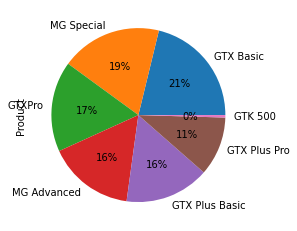

In [21]:
#Pie chart of the products

k['Product'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

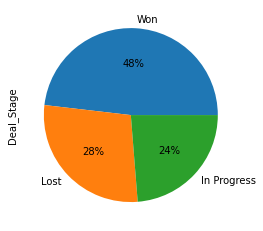

In [22]:
#Pie chart of deal stage

k['Deal_Stage'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

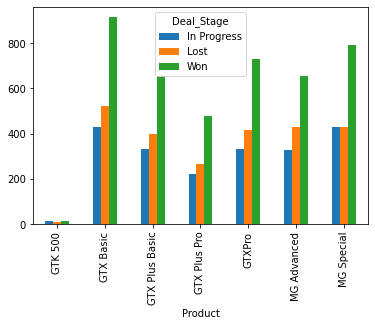

In [23]:
#Bar chart

product_deal = k.groupby(['Product', 'Deal_Stage']).Deal_Stage.count().unstack()
product_deal.plot(kind='bar')

In [24]:
#creating dataframe for the training purpose

start_date = '2016-01-01'
end_date = '2017-09-30'

mask = (k['Created Date'] >= start_date) & (k['Created Date'] <= end_date)

k_tr=k.loc[mask]

k_tr.head()

,Account,Opportunity_ID,Sales_Agent,fromEmailId,toEmailId,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff,Extracted Interaction Text
0,Konex,3KR50X38,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255,2016-01-04,2016-05-24,141,We are writing from GHF regarding the previous...
1,Finjob,YFS5KLJJ,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,45,2016-01-04,2016-11-02,303,I want to thank you for the excellent service ...
2,Kinnamplus,N0ONCYVZ,Donn Cantrell,donn@piedpiper.com,monte@kinnamplus.com,Lost,MG Special,1054,2016-01-06,2016-12-07,336,I am honored that you would choose me to fill ...
3,Genco Pura Olive Oil Company,IBEUTCSW,James Ascencio,james@piedpiper.com,karole@gencopuraoliveoilcompany.com,In Progress,MG Advanced,1054,2016-01-06,2016-09-11,249,I appreciate your contribution to Morgan Stanl...
4,Initech,G8AO5FA2,Wilburn Farren,wilburn@piedpiper.com,alejandro@initech.com,Lost,MG Advanced,517,2016-01-06,2016-09-18,256,Please accept my regrets in resigning from my ...


In [25]:
k_tr.tail()

,Account,Opportunity_ID,Sales_Agent,fromEmailId,toEmailId,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff,Extracted Interaction Text
6290,Condax,62TFLOG6,Corliss Cosme,corliss@piedpiper.com,golda@condax.com,Lost,MG Advanced,1014,2017-09-30,2019-06-12,620,My compliments on the way you conducted the di...
6291,Faxquote,8W35TVOQ,Hayden Neloms,hayden@piedpiper.com,gaylord@faxquote.com,Won,MG Advanced,2918,2017-09-30,2018-12-16,442,"However, we regret to inform you that we did r..."
6292,Toughzap,C13104YM,Versie Hillebrand,versie@piedpiper.com,sherman@toughzap.com,Lost,MG Special,500,2017-09-30,2018-06-02,245,"We are no longer in need of your service, Unde..."
6293,Scottech,U2JOATN3,Darcel Schlecht,darcel@piedpiper.com,edison@scottech.com,Won,GTXPro,6166,2017-09-30,2019-05-07,584,"Without question, such a software system will ..."
6294,Codehow,KSYI5DDW,Darcel Schlecht,darcel@piedpiper.com,justine@codehow.com,Won,MG Special,55,2017-09-30,2018-01-24,116,It gives me immense pleasure to write to you w...


In [26]:
#Neglecting the data which has deal stage as in progress for the training purpose

mask= (k_tr['Deal_Stage'] != 'In Progress')

k_train=k_tr.loc[mask]

k_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5089 entries, 0 to 6294
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Account                     5089 non-null   object        
 1   Opportunity_ID              5089 non-null   object        
 2   Sales_Agent                 5089 non-null   object        
 3   fromEmailId                 5089 non-null   object        
 4   toEmailId                   5089 non-null   object        
 5   Deal_Stage                  5089 non-null   object        
 6   Product                     5089 non-null   object        
 7   Close_Value                 5089 non-null   int64         
 8   Created Date                5089 non-null   datetime64[ns]
 9   Close Date                  5089 non-null   datetime64[ns]
 10  DateDiff                    5089 non-null   int64         
 11  Extracted Interaction Text  5089 non-null   object      

In [27]:
k_train.head()

,Account,Opportunity_ID,Sales_Agent,fromEmailId,toEmailId,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff,Extracted Interaction Text
0,Konex,3KR50X38,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255,2016-01-04,2016-05-24,141,We are writing from GHF regarding the previous...
1,Finjob,YFS5KLJJ,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,45,2016-01-04,2016-11-02,303,I want to thank you for the excellent service ...
2,Kinnamplus,N0ONCYVZ,Donn Cantrell,donn@piedpiper.com,monte@kinnamplus.com,Lost,MG Special,1054,2016-01-06,2016-12-07,336,I am honored that you would choose me to fill ...
4,Initech,G8AO5FA2,Wilburn Farren,wilburn@piedpiper.com,alejandro@initech.com,Lost,MG Advanced,517,2016-01-06,2016-09-18,256,Please accept my regrets in resigning from my ...
5,Stanredtax,2V848WZD,Lajuana Vencill,lajuana@piedpiper.com,candice@stanredtax.com,Won,MG Advanced,3180,2016-01-07,2016-01-31,24,I am writing this letter to request a business...


In [ ]:
k_train.to_excel("K_Train.xlsx")

In [28]:
uploaded = files.upload()

Saving K_Train.xlsx to K_Train.xlsx


In [29]:
k_train = pd.read_excel(uploaded['K_Train.xlsx'])

In [30]:
k_train.head()
k_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5089 entries, 0 to 5088
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  5089 non-null   int64         
 1   Account                     5089 non-null   object        
 2   Opportunity_ID              5089 non-null   object        
 3   Sales_Agent                 5089 non-null   object        
 4   fromEmailId                 5089 non-null   object        
 5   toEmailId                   5089 non-null   object        
 6   Deal_Stage                  5089 non-null   object        
 7   Product                     5089 non-null   object        
 8   Close_Value                 5089 non-null   int64         
 9   Created Date                5089 non-null   datetime64[ns]
 10  Close Date                  5089 non-null   datetime64[ns]
 11  DateDiff                    5089 non-null   int64       

In [31]:
#training
features_train = k_train.iloc[:, 12].values
labels_train = k_train.iloc[:, 6].values


In [32]:
features_train[1]

"I want to thank you for the excellent service I received at the LMN Service Center this week. The repair estimates I had received from other garages left me with little hope of a low cost repair; however, your mechanics found the problem in a faulty $12 switch and replaced it at no charge because they had serviced the car so recently. Having a mechanic that one can trust gives a welcome sense of security in today's world. I will recommend LMN Auto to all my friends., We found your bid well-prepared, but considerably higher than the competitior's. We have awarded the job to a local company. , Can we negotiate the price, your current price is too hight, I have'nt received any updates from you though I asked you specifically to send me the same, We would like to begin the project as soon as possible and look forward to meeting with you. , Thank you for your prompt deliveries to our MSD Plant. We want you to know that we appreciate your efforts and look forward to continuing our business 

In [33]:
labels_train[3]

'Lost'

In [34]:
processed_features_train = []

for sentence in range(0, len(features_train)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features_train[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features_train.append(processed_feature)

In [35]:
processed_features_train[1]

'i want to thank you for the excellent service received at the lmn service center this week the repair estimates had received from other garages left me with little hope of low cost repair however your mechanics found the problem in faulty 12 switch and replaced it at no charge because they had serviced the car so recently having mechanic that one can trust gives welcome sense of security in today world will recommend lmn auto to all my friends we found your bid well prepared but considerably higher than the competitior we have awarded the job to local company can we negotiate the price your current price is too hight have nt received any updates from you though asked you specifically to send me the same we would like to begin the project as soon as possible and look forward to meeting with you thank you for your prompt deliveries to our msd plant we want you to know that we appreciate your efforts and look forward to continuing our business relationship accept with pleasure the positi

In [37]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [38]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features_train = vectorizer.fit_transform(processed_features_train).toarray()

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(processed_features_train, labels_train, test_size=0.2, random_state=0)

In [40]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [41]:
predictions = text_classifier.predict(X_val)
predictions

array(['Lost', 'Won', 'Won', ..., 'Lost', 'Lost', 'Won'], dtype=object)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_val,predictions))
print(classification_report(y_val,predictions))
print(accuracy_score(y_val, predictions))

[[102 289]
 [144 483]]
              precision    recall  f1-score   support

        Lost       0.41      0.26      0.32       391
         Won       0.63      0.77      0.69       627

    accuracy                           0.57      1018
   macro avg       0.52      0.52      0.51      1018
weighted avg       0.54      0.57      0.55      1018

0.574656188605108


In [43]:
up = files.upload()

Saving output.xlsx to output.xlsx


In [44]:
k = pd.read_excel(up['output.xlsx'])

In [45]:
k.head()

,Unnamed: 0,Account,Opportunity_ID,Sales_Agent,fromEmailId,toEmailId,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff,Extracted Interaction Text
0,0,Konex,3KR50X38,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255,2016-01-04,2016-05-24,141,We are writing from GHF regarding the previous...
1,1,Finjob,YFS5KLJJ,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,45,2016-01-04,2016-11-02,303,I want to thank you for the excellent service ...
2,2,Kinnamplus,N0ONCYVZ,Donn Cantrell,donn@piedpiper.com,monte@kinnamplus.com,Lost,MG Special,1054,2016-01-06,2016-12-07,336,I am honored that you would choose me to fill ...
3,3,Genco Pura Olive Oil Company,IBEUTCSW,James Ascencio,james@piedpiper.com,karole@gencopuraoliveoilcompany.com,In Progress,MG Advanced,1054,2016-01-06,2016-09-11,249,I appreciate your contribution to Morgan Stanl...
4,4,Initech,G8AO5FA2,Wilburn Farren,wilburn@piedpiper.com,alejandro@initech.com,Lost,MG Advanced,517,2016-01-06,2016-09-18,256,Please accept my regrets in resigning from my ...


In [46]:
k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  8800 non-null   int64         
 1   Account                     8800 non-null   object        
 2   Opportunity_ID              8800 non-null   object        
 3   Sales_Agent                 8800 non-null   object        
 4   fromEmailId                 8800 non-null   object        
 5   toEmailId                   8800 non-null   object        
 6   Deal_Stage                  8800 non-null   object        
 7   Product                     8800 non-null   object        
 8   Close_Value                 8800 non-null   int64         
 9   Created Date                8800 non-null   datetime64[ns]
 10  Close Date                  8800 non-null   datetime64[ns]
 11  DateDiff                    8800 non-null   int64       

In [47]:
start_date = '2017-10-01'
end_date = '2017-10-31'

mask = (k['Created Date'] >= start_date) & (k['Created Date'] <= end_date) & (k['Deal_Stage'] != 'In Progress')

k_test1=k.loc[mask]

k_test1.head()

,Unnamed: 0,Account,Opportunity_ID,Sales_Agent,fromEmailId,toEmailId,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff,Extracted Interaction Text
6295,6295,Initech,9ZKORPL2,Violet Mclelland,violet@piedpiper.com,alejandro@initech.com,Won,MG Special,45,2017-10-01,2019-07-02,639,I have'nt received any updates from you though...
6297,6297,Bluth Company,IUDDK8Q0,Cassey Cress,cassey@piedpiper.com,antionette@bluthcompany.com,Lost,GTXPro,517,2017-10-01,2018-07-13,285,I am sorry that we will be unable to help you ...
6298,6298,Dontechi,KIMUGBN5,Lajuana Vencill,lajuana@piedpiper.com,kristle@dontechi.com,Lost,MG Advanced,903,2017-10-01,2019-02-28,515,see how cutting edge technology can empower yo...
6299,6299,Hatfan,VIMY08JH,Maureen Marcano,maureen@piedpiper.com,tyron@hatfan.com,Won,GTX Basic,518,2017-10-01,2019-06-20,627,"I'm not convinced with the idea, I wish to com..."
6300,6300,Ron-tech,Y9SCLUH8,Jonathan Berthelot,jonathan@piedpiper.com,kelly@ron-tech.com,Won,GTX Plus Basic,835,2017-10-01,2018-03-27,177,We are sorry to inform you that we have to ter...


In [48]:
k_test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 563 entries, 6295 to 6987
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  563 non-null    int64         
 1   Account                     563 non-null    object        
 2   Opportunity_ID              563 non-null    object        
 3   Sales_Agent                 563 non-null    object        
 4   fromEmailId                 563 non-null    object        
 5   toEmailId                   563 non-null    object        
 6   Deal_Stage                  563 non-null    object        
 7   Product                     563 non-null    object        
 8   Close_Value                 563 non-null    int64         
 9   Created Date                563 non-null    datetime64[ns]
 10  Close Date                  563 non-null    datetime64[ns]
 11  DateDiff                    563 non-null    int64     

In [49]:
#testing1
features_test1 = k_test1.iloc[:, 12].values
labels_test1 = k_test1.iloc[:, 6].values

processed_features_test1 = []

for sentence in range(0, len(features_test1)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features_test1[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features_test1.append(processed_feature)


X_test1 = vectorizer.transform(processed_features_test1).toarray()


In [50]:
y_pred1=text_classifier.predict(X_test1)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(labels_test1,y_pred1))
print(classification_report(labels_test1,y_pred1))
print(accuracy_score(labels_test1, y_pred1))

[[ 57 141]
 [ 91 274]]
              precision    recall  f1-score   support

        Lost       0.39      0.29      0.33       198
         Won       0.66      0.75      0.70       365

    accuracy                           0.59       563
   macro avg       0.52      0.52      0.52       563
weighted avg       0.56      0.59      0.57       563

0.5879218472468917


In [52]:
k_test1['Prediction']=y_pred1
k_test1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,Account,Opportunity_ID,Sales_Agent,fromEmailId,toEmailId,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff,Extracted Interaction Text,Prediction
6295,6295,Initech,9ZKORPL2,Violet Mclelland,violet@piedpiper.com,alejandro@initech.com,Won,MG Special,45,2017-10-01,2019-07-02,639,I have'nt received any updates from you though...,Lost
6297,6297,Bluth Company,IUDDK8Q0,Cassey Cress,cassey@piedpiper.com,antionette@bluthcompany.com,Lost,GTXPro,517,2017-10-01,2018-07-13,285,I am sorry that we will be unable to help you ...,Won
6298,6298,Dontechi,KIMUGBN5,Lajuana Vencill,lajuana@piedpiper.com,kristle@dontechi.com,Lost,MG Advanced,903,2017-10-01,2019-02-28,515,see how cutting edge technology can empower yo...,Lost
6299,6299,Hatfan,VIMY08JH,Maureen Marcano,maureen@piedpiper.com,tyron@hatfan.com,Won,GTX Basic,518,2017-10-01,2019-06-20,627,"I'm not convinced with the idea, I wish to com...",Won
6300,6300,Ron-tech,Y9SCLUH8,Jonathan Berthelot,jonathan@piedpiper.com,kelly@ron-tech.com,Won,GTX Plus Basic,835,2017-10-01,2018-03-27,177,We are sorry to inform you that we have to ter...,Lost


In [55]:
mask1 = (k_test1['Prediction'] == 'Won')

k_test11=k_test1.loc[mask1]

Oct_2017_pred=k_test11['Close_Value'].sum()
print(Oct_2017_pred)

mask2 = (k_test1['Deal_Stage'] == 'Won')

k_test12=k_test1.loc[mask2]

Oct_2017_act=k_test12['Close_Value'].sum()
print(Oct_2017_act)

dev1=((Oct_2017_pred-Oct_2017_act)/Oct_2017_act)*100
dev1= str(dev1)+'%'
print(dev1)

872217
871064
0.132366852493043%


In [56]:
start_date = '2017-10-01'
end_date = '2017-12-31'

mask = (k['Created Date'] >= start_date) & (k['Created Date'] <= end_date) & (k['Deal_Stage'] != 'In Progress')

k_test2=k.loc[mask]

k_test2.head()

,Unnamed: 0,Account,Opportunity_ID,Sales_Agent,fromEmailId,toEmailId,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff,Extracted Interaction Text
6295,6295,Initech,9ZKORPL2,Violet Mclelland,violet@piedpiper.com,alejandro@initech.com,Won,MG Special,45,2017-10-01,2019-07-02,639,I have'nt received any updates from you though...
6297,6297,Bluth Company,IUDDK8Q0,Cassey Cress,cassey@piedpiper.com,antionette@bluthcompany.com,Lost,GTXPro,517,2017-10-01,2018-07-13,285,I am sorry that we will be unable to help you ...
6298,6298,Dontechi,KIMUGBN5,Lajuana Vencill,lajuana@piedpiper.com,kristle@dontechi.com,Lost,MG Advanced,903,2017-10-01,2019-02-28,515,see how cutting edge technology can empower yo...
6299,6299,Hatfan,VIMY08JH,Maureen Marcano,maureen@piedpiper.com,tyron@hatfan.com,Won,GTX Basic,518,2017-10-01,2019-06-20,627,"I'm not convinced with the idea, I wish to com..."
6300,6300,Ron-tech,Y9SCLUH8,Jonathan Berthelot,jonathan@piedpiper.com,kelly@ron-tech.com,Won,GTX Plus Basic,835,2017-10-01,2018-03-27,177,We are sorry to inform you that we have to ter...


In [57]:
k_test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1622 entries, 6295 to 8299
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  1622 non-null   int64         
 1   Account                     1622 non-null   object        
 2   Opportunity_ID              1622 non-null   object        
 3   Sales_Agent                 1622 non-null   object        
 4   fromEmailId                 1622 non-null   object        
 5   toEmailId                   1622 non-null   object        
 6   Deal_Stage                  1622 non-null   object        
 7   Product                     1622 non-null   object        
 8   Close_Value                 1622 non-null   int64         
 9   Created Date                1622 non-null   datetime64[ns]
 10  Close Date                  1622 non-null   datetime64[ns]
 11  DateDiff                    1622 non-null   int64    

In [58]:
#testing1
features_test2 = k_test2.iloc[:, 12].values
labels_test2 = k_test2.iloc[:, 6].values

processed_features_test2 = []

for sentence in range(0, len(features_test2)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features_test2[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features_test2.append(processed_feature)


X_test2 = vectorizer.transform(processed_features_test2).toarray()


In [59]:
y_pred2 =text_classifier.predict(X_test2)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(labels_test2,y_pred2))
print(classification_report(labels_test2,y_pred2))
print(accuracy_score(labels_test2, y_pred2))

[[169 431]
 [263 759]]
              precision    recall  f1-score   support

        Lost       0.39      0.28      0.33       600
         Won       0.64      0.74      0.69      1022

    accuracy                           0.57      1622
   macro avg       0.51      0.51      0.51      1622
weighted avg       0.55      0.57      0.55      1622

0.5721331689272503


In [61]:
k_test2['Prediction']=y_pred2
k_test2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,Account,Opportunity_ID,Sales_Agent,fromEmailId,toEmailId,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff,Extracted Interaction Text,Prediction
6295,6295,Initech,9ZKORPL2,Violet Mclelland,violet@piedpiper.com,alejandro@initech.com,Won,MG Special,45,2017-10-01,2019-07-02,639,I have'nt received any updates from you though...,Lost
6297,6297,Bluth Company,IUDDK8Q0,Cassey Cress,cassey@piedpiper.com,antionette@bluthcompany.com,Lost,GTXPro,517,2017-10-01,2018-07-13,285,I am sorry that we will be unable to help you ...,Won
6298,6298,Dontechi,KIMUGBN5,Lajuana Vencill,lajuana@piedpiper.com,kristle@dontechi.com,Lost,MG Advanced,903,2017-10-01,2019-02-28,515,see how cutting edge technology can empower yo...,Lost
6299,6299,Hatfan,VIMY08JH,Maureen Marcano,maureen@piedpiper.com,tyron@hatfan.com,Won,GTX Basic,518,2017-10-01,2019-06-20,627,"I'm not convinced with the idea, I wish to com...",Won
6300,6300,Ron-tech,Y9SCLUH8,Jonathan Berthelot,jonathan@piedpiper.com,kelly@ron-tech.com,Won,GTX Plus Basic,835,2017-10-01,2018-03-27,177,We are sorry to inform you that we have to ter...,Lost


In [62]:
mask1 = (k_test2['Prediction'] == 'Won')

k_test21=k_test2.loc[mask1]

Quart_2017_pred=k_test21['Close_Value'].sum()
print(Quart_2017_pred)

mask2 = (k_test2['Deal_Stage'] == 'Won')

k_test22=k_test2.loc[mask2]

Quart_2017_act=k_test22['Close_Value'].sum()
print(Quart_2017_act)

dev2=((Quart_2017_pred-Quart_2017_act)/Quart_2017_act)*100
dev2= str(dev2)+'%'
print(dev2)

2502989
2435396
2.7754418583261202%


In [63]:
start_date = '2017-01-01'
end_date = '2017-12-31'

mask = (k['Created Date'] >= start_date) & (k['Created Date'] <= end_date) & (k['Deal_Stage'] != 'In Progress')

k_test3=k.loc[mask]

k_test3.head()

,Unnamed: 0,Account,Opportunity_ID,Sales_Agent,fromEmailId,toEmailId,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff,Extracted Interaction Text
358,358,Conecom,JHJEQ1U3,Niesha Huffines,niesha@piedpiper.com,ivory@conecom.com,Won,GTX Plus Pro,5604,2017-01-01,2017-01-24,23,Our congratulations on your sales success for ...
359,359,Codehow,NY9ARKRE,Marty Freudenburg,marty@piedpiper.com,justine@codehow.com,Won,MG Special,51,2017-01-01,2017-06-04,154,"However, a number of highly-qualified candidat..."
360,360,Cheers,VH78FLDN,Zane Levy,zane@piedpiper.com,robbie@cheers.com,Lost,GTXPro,1180,2017-01-01,2017-01-11,10,I am writing this letter to request a business...
361,361,Blackzim,HRV9DSYF,Vicki Laflamme,vicki@piedpiper.com,riley@blackzim.com,Won,GTX Basic,545,2017-01-01,2017-10-20,292,We appreciate your interest in Doe's English L...
362,362,Donware,AKT5EF0X,Reed Clapper,reed@piedpiper.com,eleonore@donware.com,Won,GTX Basic,572,2017-01-01,2017-02-20,50,This letter of intent is to confirm our intere...


In [64]:
k_test3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6406 entries, 358 to 8299
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  6406 non-null   int64         
 1   Account                     6406 non-null   object        
 2   Opportunity_ID              6406 non-null   object        
 3   Sales_Agent                 6406 non-null   object        
 4   fromEmailId                 6406 non-null   object        
 5   toEmailId                   6406 non-null   object        
 6   Deal_Stage                  6406 non-null   object        
 7   Product                     6406 non-null   object        
 8   Close_Value                 6406 non-null   int64         
 9   Created Date                6406 non-null   datetime64[ns]
 10  Close Date                  6406 non-null   datetime64[ns]
 11  DateDiff                    6406 non-null   int64     

In [65]:
#testing1
features_test3 = k_test3.iloc[:, 12].values
labels_test3 = k_test3.iloc[:, 6].values

processed_features_test3 = []

for sentence in range(0, len(features_test3)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features_test3[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features_test3.append(processed_feature)


X_test3 = vectorizer.transform(processed_features_test3).toarray()


In [66]:
y_pred3 =text_classifier.predict(X_test3)

In [67]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(labels_test3,y_pred3))
print(classification_report(labels_test3,y_pred3))
print(accuracy_score(labels_test3, y_pred3))

[[ 875 1543]
 [ 717 3271]]
              precision    recall  f1-score   support

        Lost       0.55      0.36      0.44      2418
         Won       0.68      0.82      0.74      3988

    accuracy                           0.65      6406
   macro avg       0.61      0.59      0.59      6406
weighted avg       0.63      0.65      0.63      6406

0.6472057446144239


In [68]:
k_test3['Prediction']=y_pred3
k_test3.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,Account,Opportunity_ID,Sales_Agent,fromEmailId,toEmailId,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff,Extracted Interaction Text,Prediction
358,358,Conecom,JHJEQ1U3,Niesha Huffines,niesha@piedpiper.com,ivory@conecom.com,Won,GTX Plus Pro,5604,2017-01-01,2017-01-24,23,Our congratulations on your sales success for ...,Lost
359,359,Codehow,NY9ARKRE,Marty Freudenburg,marty@piedpiper.com,justine@codehow.com,Won,MG Special,51,2017-01-01,2017-06-04,154,"However, a number of highly-qualified candidat...",Won
360,360,Cheers,VH78FLDN,Zane Levy,zane@piedpiper.com,robbie@cheers.com,Lost,GTXPro,1180,2017-01-01,2017-01-11,10,I am writing this letter to request a business...,Lost
361,361,Blackzim,HRV9DSYF,Vicki Laflamme,vicki@piedpiper.com,riley@blackzim.com,Won,GTX Basic,545,2017-01-01,2017-10-20,292,We appreciate your interest in Doe's English L...,Lost
362,362,Donware,AKT5EF0X,Reed Clapper,reed@piedpiper.com,eleonore@donware.com,Won,GTX Basic,572,2017-01-01,2017-02-20,50,This letter of intent is to confirm our intere...,Won


In [69]:
mask1 = (k_test3['Prediction'] == 'Won')

k_test31=k_test3.loc[mask1]

Fin_2017_pred=k_test31['Close_Value'].sum()
print(Fin_2017_pred)

mask2 = (k_test3['Deal_Stage'] == 'Won')

k_test32=k_test3.loc[mask2]

Fin_2017_act=k_test32['Close_Value'].sum()
print(Fin_2017_act)

dev3=((Fin_2017_pred-Fin_2017_act)/Fin_2017_act)*100
dev3= str(dev3)+'%'
print(dev3)

10097257
9482003
6.488650130146552%


In [70]:
start_date = '2018-01-01'
end_date = '2018-01-31'

mask = (k['Created Date'] >= start_date) & (k['Created Date'] <= end_date)

k_test4=k.loc[mask]

k_test4.head()

,Unnamed: 0,Account,Opportunity_ID,Sales_Agent,fromEmailId,toEmailId,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff,Extracted Interaction Text
8300,8300,Isdom,647SQRGL,Niesha Huffines,niesha@piedpiper.com,corrinne@isdom.com,In Progress,GTX Basic,3180,2018-01-01,2018-05-14,133,It was good to make your acquaintance last wee...
8301,8301,Toughzap,FMRVHL9O,Marty Freudenburg,marty@piedpiper.com,sherman@toughzap.com,In Progress,GTX Plus Basic,1026,2018-01-03,2018-06-20,168,"Deal has been closed., The deal has been succe..."
8302,8302,Rundofase,Q9CASEJL,Gladys Colclough,gladys@piedpiper.com,crista@rundofase.com,In Progress,MG Special,3284,2018-01-04,2019-08-28,601,"However, I am unable to join because of my fam..."
8303,8303,Plexzap,8IPMP8NT,Darcel Schlecht,darcel@piedpiper.com,titus@plexzap.com,In Progress,GTXPro,4631,2018-01-05,2018-05-15,130,I am not sure if we need the product right now...
8304,8304,Gekko & Co,N6JMQG0E,Lajuana Vencill,lajuana@piedpiper.com,krystle@gekko&co.com,In Progress,MG Special,3284,2018-01-05,2018-05-28,143,Please accept this letter as official notifica...


In [71]:
k_test4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 8300 to 8333
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  34 non-null     int64         
 1   Account                     34 non-null     object        
 2   Opportunity_ID              34 non-null     object        
 3   Sales_Agent                 34 non-null     object        
 4   fromEmailId                 34 non-null     object        
 5   toEmailId                   34 non-null     object        
 6   Deal_Stage                  34 non-null     object        
 7   Product                     34 non-null     object        
 8   Close_Value                 34 non-null     int64         
 9   Created Date                34 non-null     datetime64[ns]
 10  Close Date                  34 non-null     datetime64[ns]
 11  DateDiff                    34 non-null     int64      

In [72]:
#testing1
features_test4 = k_test4.iloc[:, 12].values
labels_test4 = k_test4.iloc[:, 6].values

processed_features_test4 = []

for sentence in range(0, len(features_test4)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features_test4[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features_test4.append(processed_feature)


X_test4 = vectorizer.transform(processed_features_test4).toarray()

y_pred4 =text_classifier.predict(X_test4)

In [73]:
k_test4['Prediction']=y_pred4
k_test4.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,Account,Opportunity_ID,Sales_Agent,fromEmailId,toEmailId,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff,Extracted Interaction Text,Prediction
8300,8300,Isdom,647SQRGL,Niesha Huffines,niesha@piedpiper.com,corrinne@isdom.com,In Progress,GTX Basic,3180,2018-01-01,2018-05-14,133,It was good to make your acquaintance last wee...,Won
8301,8301,Toughzap,FMRVHL9O,Marty Freudenburg,marty@piedpiper.com,sherman@toughzap.com,In Progress,GTX Plus Basic,1026,2018-01-03,2018-06-20,168,"Deal has been closed., The deal has been succe...",Won
8302,8302,Rundofase,Q9CASEJL,Gladys Colclough,gladys@piedpiper.com,crista@rundofase.com,In Progress,MG Special,3284,2018-01-04,2019-08-28,601,"However, I am unable to join because of my fam...",Lost
8303,8303,Plexzap,8IPMP8NT,Darcel Schlecht,darcel@piedpiper.com,titus@plexzap.com,In Progress,GTXPro,4631,2018-01-05,2018-05-15,130,I am not sure if we need the product right now...,Won
8304,8304,Gekko & Co,N6JMQG0E,Lajuana Vencill,lajuana@piedpiper.com,krystle@gekko&co.com,In Progress,MG Special,3284,2018-01-05,2018-05-28,143,Please accept this letter as official notifica...,Won


In [74]:
mask = (k_test4['Prediction'] == 'Won')

k_test4=k_test4.loc[mask]

Jan_2018=k_test4['Close_Value'].sum()
print(Jan_2018)

52134


In [75]:
start_date = '2018-01-01'
end_date = '2018-03-31'

mask = (k['Created Date'] >= start_date) & (k['Created Date'] <= end_date)

k_test5=k.loc[mask]

k_test5.head()

,Unnamed: 0,Account,Opportunity_ID,Sales_Agent,fromEmailId,toEmailId,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff,Extracted Interaction Text
8300,8300,Isdom,647SQRGL,Niesha Huffines,niesha@piedpiper.com,corrinne@isdom.com,In Progress,GTX Basic,3180,2018-01-01,2018-05-14,133,It was good to make your acquaintance last wee...
8301,8301,Toughzap,FMRVHL9O,Marty Freudenburg,marty@piedpiper.com,sherman@toughzap.com,In Progress,GTX Plus Basic,1026,2018-01-03,2018-06-20,168,"Deal has been closed., The deal has been succe..."
8302,8302,Rundofase,Q9CASEJL,Gladys Colclough,gladys@piedpiper.com,crista@rundofase.com,In Progress,MG Special,3284,2018-01-04,2019-08-28,601,"However, I am unable to join because of my fam..."
8303,8303,Plexzap,8IPMP8NT,Darcel Schlecht,darcel@piedpiper.com,titus@plexzap.com,In Progress,GTXPro,4631,2018-01-05,2018-05-15,130,I am not sure if we need the product right now...
8304,8304,Gekko & Co,N6JMQG0E,Lajuana Vencill,lajuana@piedpiper.com,krystle@gekko&co.com,In Progress,MG Special,3284,2018-01-05,2018-05-28,143,Please accept this letter as official notifica...


In [76]:
k_test5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 8300 to 8422
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  123 non-null    int64         
 1   Account                     123 non-null    object        
 2   Opportunity_ID              123 non-null    object        
 3   Sales_Agent                 123 non-null    object        
 4   fromEmailId                 123 non-null    object        
 5   toEmailId                   123 non-null    object        
 6   Deal_Stage                  123 non-null    object        
 7   Product                     123 non-null    object        
 8   Close_Value                 123 non-null    int64         
 9   Created Date                123 non-null    datetime64[ns]
 10  Close Date                  123 non-null    datetime64[ns]
 11  DateDiff                    123 non-null    int64     

In [77]:
#testing1
features_test5 = k_test5.iloc[:, 12].values
labels_test5 = k_test5.iloc[:, 6].values

processed_features_test5 = []

for sentence in range(0, len(features_test5)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features_test5[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features_test5.append(processed_feature)


X_test5 = vectorizer.transform(processed_features_test5).toarray()

y_pred5 =text_classifier.predict(X_test5)

In [78]:
k_test5['Prediction']=y_pred5
k_test5.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,Account,Opportunity_ID,Sales_Agent,fromEmailId,toEmailId,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff,Extracted Interaction Text,Prediction
8300,8300,Isdom,647SQRGL,Niesha Huffines,niesha@piedpiper.com,corrinne@isdom.com,In Progress,GTX Basic,3180,2018-01-01,2018-05-14,133,It was good to make your acquaintance last wee...,Won
8301,8301,Toughzap,FMRVHL9O,Marty Freudenburg,marty@piedpiper.com,sherman@toughzap.com,In Progress,GTX Plus Basic,1026,2018-01-03,2018-06-20,168,"Deal has been closed., The deal has been succe...",Won
8302,8302,Rundofase,Q9CASEJL,Gladys Colclough,gladys@piedpiper.com,crista@rundofase.com,In Progress,MG Special,3284,2018-01-04,2019-08-28,601,"However, I am unable to join because of my fam...",Lost
8303,8303,Plexzap,8IPMP8NT,Darcel Schlecht,darcel@piedpiper.com,titus@plexzap.com,In Progress,GTXPro,4631,2018-01-05,2018-05-15,130,I am not sure if we need the product right now...,Won
8304,8304,Gekko & Co,N6JMQG0E,Lajuana Vencill,lajuana@piedpiper.com,krystle@gekko&co.com,In Progress,MG Special,3284,2018-01-05,2018-05-28,143,Please accept this letter as official notifica...,Won


In [79]:
mask = (k_test5['Prediction'] == 'Won')

k_test5=k_test5.loc[mask]

Quart_2018=k_test5['Close_Value'].sum()
print(Quart_2018)

185699


In [80]:
start_date = '2018-01-01'
end_date = '2018-12-31'

mask = (k['Created Date'] >= start_date) & (k['Created Date'] <= end_date)

k_test6=k.loc[mask]

k_test6.head()

,Unnamed: 0,Account,Opportunity_ID,Sales_Agent,fromEmailId,toEmailId,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff,Extracted Interaction Text
8300,8300,Isdom,647SQRGL,Niesha Huffines,niesha@piedpiper.com,corrinne@isdom.com,In Progress,GTX Basic,3180,2018-01-01,2018-05-14,133,It was good to make your acquaintance last wee...
8301,8301,Toughzap,FMRVHL9O,Marty Freudenburg,marty@piedpiper.com,sherman@toughzap.com,In Progress,GTX Plus Basic,1026,2018-01-03,2018-06-20,168,"Deal has been closed., The deal has been succe..."
8302,8302,Rundofase,Q9CASEJL,Gladys Colclough,gladys@piedpiper.com,crista@rundofase.com,In Progress,MG Special,3284,2018-01-04,2019-08-28,601,"However, I am unable to join because of my fam..."
8303,8303,Plexzap,8IPMP8NT,Darcel Schlecht,darcel@piedpiper.com,titus@plexzap.com,In Progress,GTXPro,4631,2018-01-05,2018-05-15,130,I am not sure if we need the product right now...
8304,8304,Gekko & Co,N6JMQG0E,Lajuana Vencill,lajuana@piedpiper.com,krystle@gekko&co.com,In Progress,MG Special,3284,2018-01-05,2018-05-28,143,Please accept this letter as official notifica...


In [81]:
k_test6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 8300 to 8799
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  500 non-null    int64         
 1   Account                     500 non-null    object        
 2   Opportunity_ID              500 non-null    object        
 3   Sales_Agent                 500 non-null    object        
 4   fromEmailId                 500 non-null    object        
 5   toEmailId                   500 non-null    object        
 6   Deal_Stage                  500 non-null    object        
 7   Product                     500 non-null    object        
 8   Close_Value                 500 non-null    int64         
 9   Created Date                500 non-null    datetime64[ns]
 10  Close Date                  500 non-null    datetime64[ns]
 11  DateDiff                    500 non-null    int64     

In [82]:
#testing1
features_test6 = k_test6.iloc[:, 12].values
labels_test6 = k_test6.iloc[:, 6].values

processed_features_test6 = []

for sentence in range(0, len(features_test6)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features_test6[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features_test6.append(processed_feature)


X_test6 = vectorizer.transform(processed_features_test6).toarray()

y_pred6 =text_classifier.predict(X_test6)

In [83]:
k_test6['Prediction']=y_pred6
k_test6.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,Account,Opportunity_ID,Sales_Agent,fromEmailId,toEmailId,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff,Extracted Interaction Text,Prediction
8300,8300,Isdom,647SQRGL,Niesha Huffines,niesha@piedpiper.com,corrinne@isdom.com,In Progress,GTX Basic,3180,2018-01-01,2018-05-14,133,It was good to make your acquaintance last wee...,Won
8301,8301,Toughzap,FMRVHL9O,Marty Freudenburg,marty@piedpiper.com,sherman@toughzap.com,In Progress,GTX Plus Basic,1026,2018-01-03,2018-06-20,168,"Deal has been closed., The deal has been succe...",Won
8302,8302,Rundofase,Q9CASEJL,Gladys Colclough,gladys@piedpiper.com,crista@rundofase.com,In Progress,MG Special,3284,2018-01-04,2019-08-28,601,"However, I am unable to join because of my fam...",Lost
8303,8303,Plexzap,8IPMP8NT,Darcel Schlecht,darcel@piedpiper.com,titus@plexzap.com,In Progress,GTXPro,4631,2018-01-05,2018-05-15,130,I am not sure if we need the product right now...,Won
8304,8304,Gekko & Co,N6JMQG0E,Lajuana Vencill,lajuana@piedpiper.com,krystle@gekko&co.com,In Progress,MG Special,3284,2018-01-05,2018-05-28,143,Please accept this letter as official notifica...,Won


In [84]:
mask = (k_test6['Prediction'] == 'Won')

k_test6=k_test6.loc[mask]

k_test6.head()

,Unnamed: 0,Account,Opportunity_ID,Sales_Agent,fromEmailId,toEmailId,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff,Extracted Interaction Text,Prediction
8300,8300,Isdom,647SQRGL,Niesha Huffines,niesha@piedpiper.com,corrinne@isdom.com,In Progress,GTX Basic,3180,2018-01-01,2018-05-14,133,It was good to make your acquaintance last wee...,Won
8301,8301,Toughzap,FMRVHL9O,Marty Freudenburg,marty@piedpiper.com,sherman@toughzap.com,In Progress,GTX Plus Basic,1026,2018-01-03,2018-06-20,168,"Deal has been closed., The deal has been succe...",Won
8303,8303,Plexzap,8IPMP8NT,Darcel Schlecht,darcel@piedpiper.com,titus@plexzap.com,In Progress,GTXPro,4631,2018-01-05,2018-05-15,130,I am not sure if we need the product right now...,Won
8304,8304,Gekko & Co,N6JMQG0E,Lajuana Vencill,lajuana@piedpiper.com,krystle@gekko&co.com,In Progress,MG Special,3284,2018-01-05,2018-05-28,143,Please accept this letter as official notifica...,Won
8305,8305,Rundofase,BV75OM0B,Darcel Schlecht,darcel@piedpiper.com,crista@rundofase.com,In Progress,GTXPro,61,2018-01-06,2018-04-21,105,My last day of being a manager at MaXCorp will...,Won


In [85]:

Fin_2018=k_test6['Close_Value'].sum()
print(Fin_2018)

663375


In [86]:
# intialise data of lists. 
data = {'Month/Quarter/Year':['October 2017 (Month)', 'Quarter 3 2017 (Oct, Nov,Dec) 2017', 'Financial Year 2017 (From Jan 2017 to Dec 2017)', 'January 2018 (Month)','Quarter 1 2018 (Jan,Feb,Mar) 2018','Financial Year 2018 (From Jan 2018 to Dec 2018'], 'Forecasted Revenue':[Oct_2017_pred, Quart_2017_pred, Fin_2017_pred, Jan_2018, Quart_2018, Fin_2018],'Actual Revenue':[Oct_2017_act, Quart_2017_act, Fin_2017_act, 'N/A','N/A','N/A'],'% Deviation From Actuals':[dev1, dev2, dev3, 'N/A','N/A','N/A']} 
  
# Create DataFrame 
df = pd.DataFrame(data) 
  
# Print the output. 
df 

,Month/Quarter/Year,Forecasted Revenue,Actual Revenue,% Deviation From Actuals
0,October 2017 (Month),872217,871064,0.132366852493043%
1,"Quarter 3 2017 (Oct, Nov,Dec) 2017",2502989,2435396,2.7754418583261202%
2,Financial Year 2017 (From Jan 2017 to Dec 2017),10097257,9482003,6.488650130146552%
3,January 2018 (Month),52134,N/A,N/A
4,"Quarter 1 2018 (Jan,Feb,Mar) 2018",185699,N/A,N/A
5,Financial Year 2018 (From Jan 2018 to Dec 2018,663375,N/A,N/A
